Question 1

## Summary of interactions for question 1

Here's a summary of our exchanges:

Summary of Interactions
Introduction to Classification Decision Trees

Explained that classification decision trees are a supervised learning algorithm used to classify data points into discrete categories.
Key components: root node, internal nodes, branches, and leaf nodes.
Steps: Feature-based splitting, path traversal, and final class prediction.
Advantages (e.g., interpretability, versatility) and limitations (e.g., overfitting).
Applications of Classification Decision Trees

Provided real-world applications in fields like healthcare, business, finance, education, technology, environment, transportation, social media, criminal justice, and energy.
Examples: Disease diagnosis, spam filtering, customer segmentation, fraud detection, species classification, and predictive maintenance.
Comparison Between Classification Decision Trees and Multiple Linear Regression

Classification decision trees predict discrete class labels by traversing a tree, splitting data into subsets based on features.
Multiple linear regression predicts continuous values using a linear equation that minimizes error.
Highlighted key differences in process, output, interpretability, and type of problem addressed.
Difference Between Classification and Regression

Classification: Predicts categorical outcomes (e.g., "Yes"/"No") and is used in problems like spam detection or customer churn prediction.
Regression: Predicts continuous outcomes (e.g., house prices, stock prices) by fitting a line or curve to data.
Summarized differences in output type, evaluation metrics, and examples.
Let me know if you need adjustments or additional details!

Transcript: https://chatgpt.com/share/673b92f2-97dc-800e-9e19-965958ed9bc5

Question 2

Accuracy:
A real life application scenario would be detecting spam emails. This is appropriate because the cost of misclassifying an email is around the same. This means that the misclassification will overall contribute equally to the system's performance. This is relvant because accuracy measures the porportaion all correct predictions over all cases. All in all, accuracy is a good choice to make when errors in the system have similar costs.

Sensitivity:
A real life application scenario would be screening for diseases. Here, it is important to identify true positives very quickly because missing one has a very high cost. Thus, sensitivity ensures that you can correctly identify all positives even if there might be a high rate of making false positives. Thus, sensitivity is vital when trying to catch all positive cases, and the cost of false negatives is higher than false positives.

Specificity:
A real life application scenario would be detecting fraud in banks. Specificity is important hear because banks need to avoid incorrectly identifying fraud behavior in other words making false positives. This is because, although it is important to flag frauds, incorrectly doing so would lead to customer dissastisfication since their accounts could be blocked. In other words, specificty is important when the cost of false positives is high. 

Precision:
A real life application scenario would be generating the reseults of a search engine. Precision is important here becuase the search engine needs to be displaying results that are relvant to what the user had searched for. So, the search engine needs to minimize false positives and ensure true positive since there would be high user dissastisfaction with the search engine otherwise. Furthermore, precision is especially relevant when the goal is to ensure reliable positive predictions.

## Summary of interactions for question 2

Summary of Interactions
Introduction to Accuracy
Defined accuracy as the proportion of correct predictions (true positives and true negatives) out of all cases.
Explained that accuracy works well in scenarios like email spam detection, where the importance of true positives (correctly identifying spam) and true negatives (correctly identifying legitimate emails) is roughly equal.
Highlighted that accuracy is suitable when all errors have similar consequences.
Introduction to Sensitivity
Defined sensitivity as the proportion of actual positives that are correctly identified (true positives divided by all actual positives).
Provided a scenario of disease screening (e.g., cancer detection) where sensitivity is crucial to ensure no positive cases are missed, as false negatives could have severe consequences.
Explained that sensitivity is ideal when catching all positive cases is critical, even at the cost of more false positives.
Introduction to Specificity
Defined specificity as the proportion of actual negatives that are correctly identified (true negatives divided by all actual negatives).
Provided a scenario of fraud detection in banking, where specificity is important to avoid false positives, which could inconvenience customers by flagging legitimate transactions as fraudulent.
Explained that specificity is best used when minimizing false positives is critical to maintaining trust and avoiding unnecessary disruptions.
Introduction to Precision
Defined precision as the proportion of positive predictions that are actually correct (true positives divided by all predicted positives).
Provided a scenario of search engine results, where precision ensures that the results shown to users are relevant.
Explained that precision is crucial when the cost of false positives is high, and the goal is to deliver reliable and relevant positive predictions rather than merely maximizing all correct predictions.
Let me know if you'd like me to add or adjust anything!

Transcript: https://chatgpt.com/share/673b92f2-97dc-800e-9e19-965958ed9bc5

Question 3 


In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [5]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove the specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with any remaining NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Use .loc to explicitly set the types
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Show the first few rows of the updated dataset to verify
ab_reduced_noNaN.head()



,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4


Question 4

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset (as done in previous steps)
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove the specified columns and drop NaN values
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab_reduced_noNaN = ab_reduced.dropna()

# Convert 'Pub year' and 'NumPages' to int type, and 'Hard_or_Paper' to category type
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Perform the 80/20 train-test split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in the training and test sets
train_size = ab_reduced_noNaN_train.shape[0]
test_size = ab_reduced_noNaN_test.shape[0]

train_size, test_size


(255, 64)

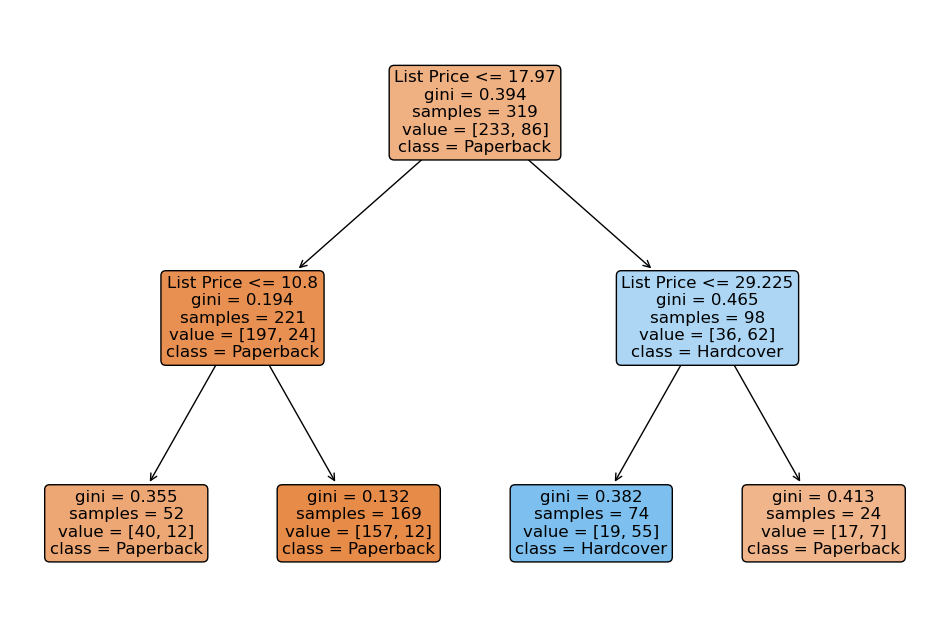

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Prepare the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable: Hardcover (1) or Paperback (0)
X = ab_reduced_noNaN[['List Price']]  # Feature variable: List Price

# Step 2: Create and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)  # max_depth set to 2
clf.fit(X, y)  # Fit the model with the feature (X) and target (y)

# Step 3: Visualize the decision tree
plt.figure(figsize=(12, 8))  # Set the figure size for the plot
plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], rounded=True, fontsize=12)
plt.show(renderer="png")


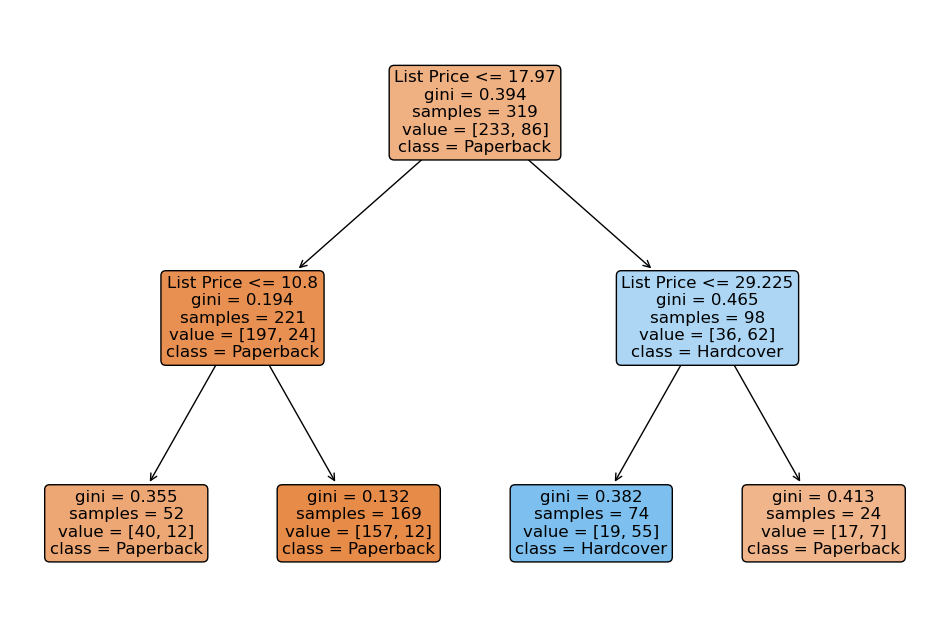

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Plot the decision tree
plt.figure(figsize=(12, 8))  # Set the figure size for the plot
tree.plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], rounded=True, fontsize=12)
plt.show(renderer="png")


This tree shows how you can identify the type of the book based on its price. In other words, each time the tree splits, it is based on the price threshold.

## Summary of interactions for questions 3 and 4

Here is a summary of our exchanges:

Amazon Books Dataset Pre-processing:

We discussed the pre-processing steps for the Amazon books dataset, including removing unnecessary columns (Weight_oz, Width, Height), dropping rows with missing values (NaN), and setting the correct data types for Pub year, NumPages, and Hard_or_Paper.
80/20 Data Split:

I provided code to create an 80/20 train-test split from the cleaned dataset, using train_test_split from scikit-learn, with a random seed set for reproducibility. We split the data into ab_reduced_noNaN_train for training and ab_reduced_noNaN_test for testing.
Setting up for Decision Tree Model:

You were preparing to fit a DecisionTreeClassifier model to predict whether a book is hardcover or paperback based on the List Price. I explained how to prepare the target variable (y) and feature (X), as well as how to fit a decision tree with max_depth=2.
Training the Decision Tree Model:

I provided the code to train a DecisionTreeClassifier with List Price as the feature and Hard_or_Paper as the target, with a maximum depth of 2.
We also discussed visualizing the decision tree using plot_tree from scikit-learn, which helps in interpreting the predictions the model makes based on the List Price.
Visualizing and Explaining the Decision Tree:

I showed how to visualize the trained decision tree and explained the predictions made by the model based on List Price. This includes how the tree splits on List Price thresholds to classify books as either paperback or hardcover.
This summary includes all the key steps in preparing the dataset, splitting the data, training the model, and visualizing the decision tree. If you need any additional details or clarifications, feel free to ask!

Transcript: https://chatgpt.com/share/673b92f2-97dc-800e-9e19-965958ed9bc5

Question 5

This model makes predictions by using 3 features: numpages, thick, and list price. Thus, it can make more nuanced classifications and creates a tree with more splits. The root node evaluates the list price, and at each sibsequent node thickness or number of pages is evaluated to finally conclude if the book is paper back or hardcover.

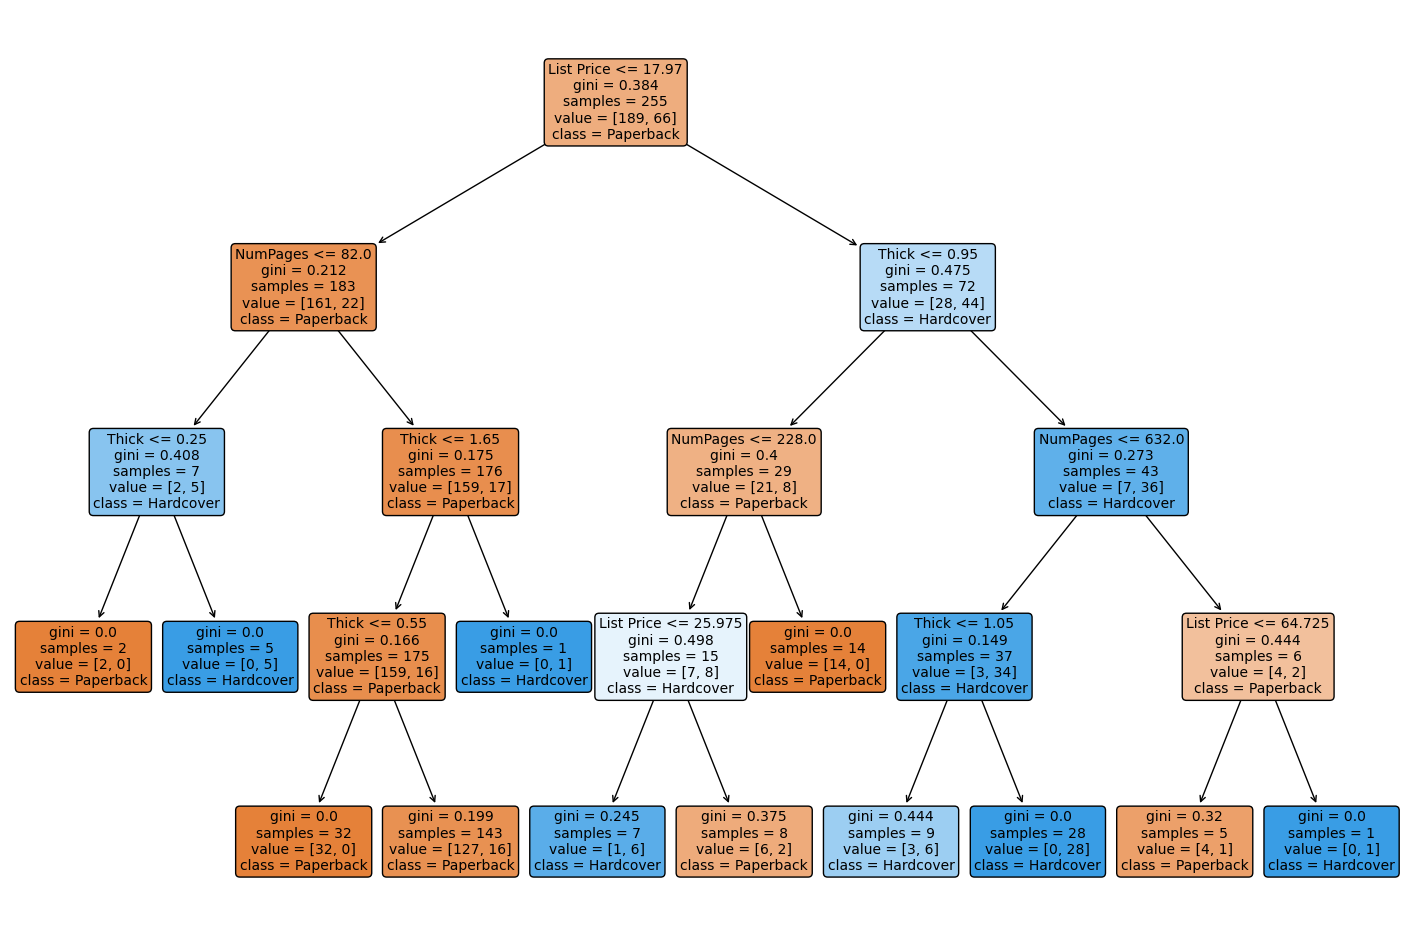

In [9]:
# Step 1: Prepare the features and target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Predictor variables
y = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']  # Target variable (binary)

# Step 2: Train the Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']], y.loc[ab_reduced_noNaN_train.index])

# Step 3: Visualize the Decision Tree with tree.plot_tree
plt.figure(figsize=(18, 12))
tree.plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.show(renderer="png")

Question 6

Metrics for clf:
Confusion Matrix:
[[40  4]
 [ 3 17]]
Accuracy: 0.891
Sensitivity: 0.850
Specificity: 0.909

Metrics for clf2:
Confusion Matrix:
[[40  4]
 [ 5 15]]
Accuracy: 0.859
Sensitivity: 0.750
Specificity: 0.909


Text(0.5, 1.0, 'Confusion Matrix for clf2')

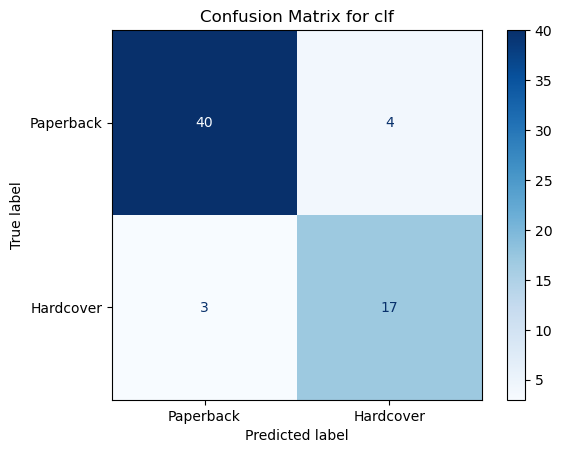

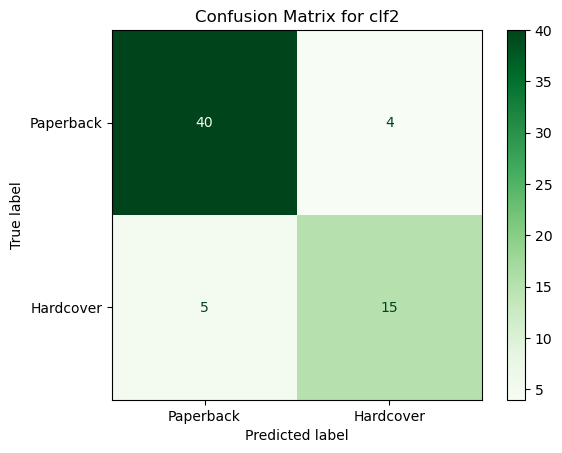

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Predicting for clf and clf2
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])
y_pred_clf2 = clf2.predict(ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']])

# True labels
y_true = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Confusion Matrices
cm_clf = confusion_matrix(y_true, y_pred_clf)
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)

# Calculating Metrics for clf
accuracy_clf = accuracy_score(y_true, y_pred_clf)
sensitivity_clf = recall_score(y_true, y_pred_clf)  # TP / (TP + FN)
specificity_clf = cm_clf[0, 0] / (cm_clf[0, 0] + cm_clf[0, 1])  # TN / (TN + FP)

# Calculating Metrics for clf2
accuracy_clf2 = accuracy_score(y_true, y_pred_clf2)
sensitivity_clf2 = recall_score(y_true, y_pred_clf2)  # TP / (TP + FN)
specificity_clf2 = cm_clf2[0, 0] / (cm_clf2[0, 0] + cm_clf2[0, 1])  # TN / (TN + FP)

# Displaying Results
print("Metrics for clf:")
print(f"Confusion Matrix:\n{cm_clf}")
print(f"Accuracy: {accuracy_clf:.3f}")
print(f"Sensitivity: {sensitivity_clf:.3f}")
print(f"Specificity: {specificity_clf:.3f}\n")

print("Metrics for clf2:")
print(f"Confusion Matrix:\n{cm_clf2}")
print(f"Accuracy: {accuracy_clf2:.3f}")
print(f"Sensitivity: {sensitivity_clf2:.3f}")
print(f"Specificity: {specificity_clf2:.3f}")

from sklearn.metrics import ConfusionMatrixDisplay

# Visualize clf
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap='Blues')
disp_clf.ax_.set_title("Confusion Matrix for clf")

# Visualize clf2
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap='Greens')
disp_clf2.ax_.set_title("Confusion Matrix for clf2")


Question 7

The differences are caused by the fact that the first model below only looks at the effect of a single predictor which is list price while the second model uses 3 predictors. Thus, the second model can distniguish between hard and paper books better. The confusion matrixes above are better because it is from the test sets, representing how the model performs with unseen data. However, the confusion matrixes below are from the training data which could lead to overly good performance.

## Summary of interactions for questions 5, 6, 7

Summary of Our Exchanges
Preprocessing the Dataset

We started by exploring the Amazon Books dataset.
You removed the columns Weight_oz, Width, and Height.
Rows with missing values (NaN) were dropped after subsetting to the columns of interest.
The Pub year and NumPages columns were converted to integers, and Hard_or_Paper was converted to a categorical type.
Splitting the Data

The dataset was split into 80% training data and 20% testing data using train_test_split, with a random seed to ensure reproducibility.
The number of observations in the training and testing datasets was reported.
Fitting and Visualizing a Decision Tree

We trained a DecisionTreeClassifier (clf) using the List Price variable to predict whether a book is hard or paperback.
The model was trained on the training data and visualized using tree.plot_tree.
Predictions were made based on the threshold splits defined by the List Price.
Expanding the Model

A second decision tree (clf2) was trained using multiple predictor variables: NumPages, Thick, and List Price.
The tree had a max_depth of 4, allowing for more complex decision boundaries.
The differences between the simpler model (clf) and the more complex model (clf2) were discussed, emphasizing that clf2 considers more features, leading to more nuanced predictions.
Evaluating the Models with Confusion Matrices

Confusion matrices for both clf and clf2 were generated using the test dataset.
Metrics such as accuracy, sensitivity, and specificity were calculated for both models.
The results showed that while clf2 could theoretically capture more complexity, it had lower accuracy and sensitivity than the simpler clf, possibly due to overfitting or irrelevant features.
Understanding Confusion Matrices

You learned how to interpret a confusion matrix, including:
The meaning of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
How to compute metrics like accuracy, sensitivity, specificity, and precision from the matrix.
We discussed how the placement of values in the matrix corresponds to the model's predictions versus actual labels.
Comparing Training Confusion Matrices

Two confusion matrices from the training dataset were compared: one for clf and another for clf2.
Differences in complexity and the use of additional features by clf2 explained the variations in predictions.
The simpler clf showed better generalization to the test data, while clf2 struggled with accuracy despite using more predictors.
This summary reflects the progression of our discussion and highlights the steps you took to preprocess data, train decision tree models, evaluate them, and understand their results. Let me know if you'd like to add or revise anything!

Transcript: https://chatgpt.com/share/673b92f2-97dc-800e-9e19-965958ed9bc5

Question 8

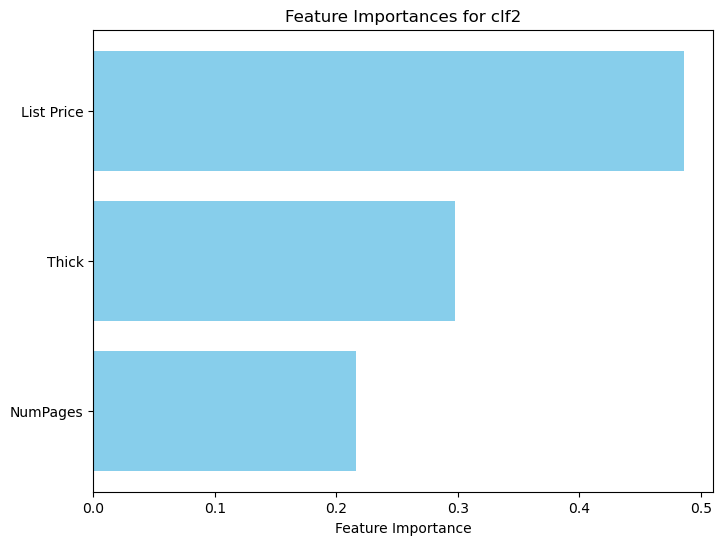

The most important predictor variable for clf2 is: List Price


In [12]:
import matplotlib.pyplot as plt

# Access feature importances and corresponding feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importances for clf2")
plt.show(renderer="png")

# Report the most important predictor
most_important_feature = feature_names[feature_importances.argmax()]
print(f"The most important predictor variable for clf2 is: {most_important_feature}")


Question 9 

In linear regression models, coefficiants are important to interpret becuase they represent the strength of the relationship between predictors and outcomes. However, in decision trees, feature importances show the overall contribution of each variable to a model's predictove power. Thus, feature importances do not represent any relationships but instead measure the effect of a variable in splitting data for classification purposes.

## Summary of interactions for questions 8, 9

Summary of Exchanges
Dataset Preprocessing:

You removed unnecessary columns (Weight_oz, Width, Height) from the ab_reduced_noNaN dataset.
Handled missing data by dropping rows with NaN values.
Changed data types: Pub year and NumPages were converted to integers, and Hard_or_Paper to a categorical type.
Train/Test Split:

Split the processed dataset into training (80%) and testing (20%) sets using train_test_split with a fixed random seed for reproducibility.
Verified the sizes of the training and testing datasets.
Model 1 (clf):

Trained a DecisionTreeClassifier (max_depth=2) using List Price as the only predictor to classify books as hardcover or paperback.
Visualized the decision tree and interpreted its predictions based on price thresholds.
Model 2 (clf2):

Trained another DecisionTreeClassifier (max_depth=4) using multiple predictors: NumPages, Thick, and List Price.
Visualized and interpreted this more complex decision tree.
Comparison of Models:

Compared the performance of clf and clf2 using confusion matrices and calculated sensitivity, specificity, and accuracy for both models.
Discussed differences in their performance, noting that while clf2 used more predictors, it may not always lead to better accuracy or sensitivity due to potential overfitting.
Confusion Matrix Interpretation:

Explained how to read confusion matrices, identifying true positives, true negatives, false positives, and false negatives.
Discussed the implications of sensitivity and specificity values and how they relate to model performance.
Feature Importances:

Explored the importance of predictors in clf2 using .feature_importances_ and .feature_names_in_.
Identified which predictors were most influential for the model’s decisions.
Linear Regression Coefficients vs. Decision Tree Feature Importances:

Clarified that linear regression coefficients show the direct and interpretable relationship between predictors and outcomes.
Highlighted that decision tree feature importances indicate the aggregated contribution of predictors to improving model splits, which is less direct but captures non-linear interactions.
This summary encapsulates the key discussions and steps from our interaction, ensuring all technical details and explanations are included for submission.

Transcript: https://chatgpt.com/share/673b92f2-97dc-800e-9e19-965958ed9bc5

Question 10
Yes